### Fitting logistic regression to choice probability vs delta probability

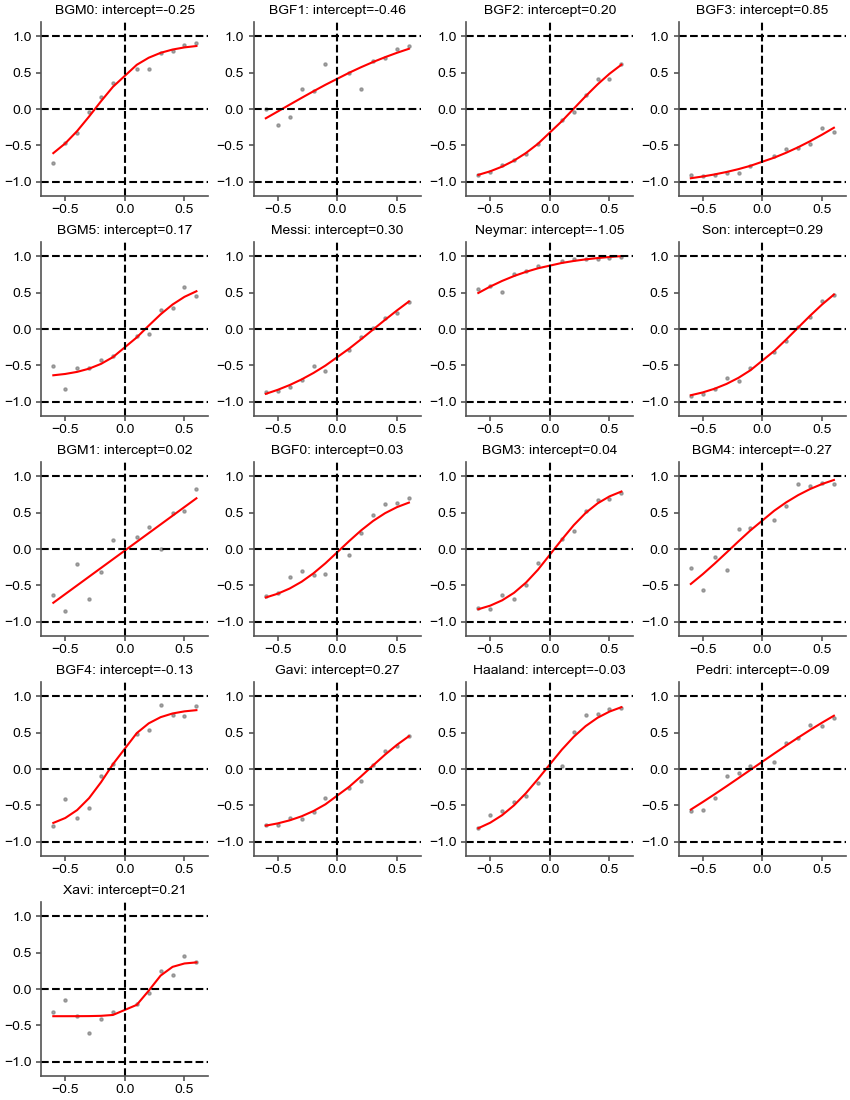

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mab_subjects
from neuropy import plotting

exps = mab_subjects.mostly_unstruc.allsess + mab_subjects.mostly_struc.allsess

fig = plotting.Fig(5, 4, fontsize=10)

bias_df = []
for e, exp in enumerate(exps):

    task = exp.b2a
    fit_params, x, y, y_est = task.get_port_bias(kind="tanh")

    ax = fig.subplot(fig.gs[e])

    ax.scatter(x, y, s=5, color="gray", alpha=0.7)
    ax.plot(x, y_est, "-r")
    ax.axhline(0, color="k", linestyle="--")
    ax.axvline(0, color="k", linestyle="--")
    ax.set_title(f"{exp.sub_name}: intercept={fit_params[2]:.2f}")
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-1.2, 1.2)
    ax.axhline(1, color="k", linestyle="--")
    ax.axhline(-1, color="k", linestyle="--")

    df = pd.DataFrame(
        dict(
            sub_name=[exp.sub_name],
            # slope=[fit_params.slope],
            # intercept=[fit_params.intercept],
            grp=[exp.group_tag],
        )
    )
    bias_df.append(df)

bias_df = pd.concat(bias_df, ignore_index=True)
# mab_subjects.GroupData().save(bias_df, "bias")

In [ ]:
from neuropy import plotting

fig = plotting.Fig(4, 4, fontsize=10)

ax = fig.subplot(fig.gs[0, 0])
ax.scatter(bias_df["slope"], np.abs(bias_df["intercept"]), c="k", alpha=0.7, s=20)
# ax.hist(np.abs(bias_df["intercept"]), bins=20, color="k", alpha=0.7)
# ax.set_xlim(0.5, 1)

ax.set_xlabel("Slope of port bias")
ax.set_ylabel("Absolute Intercept of port bias")

In [3]:
[exp.sub_name for exp in exps]

['BGM0',
 'BGF1',
 'BGF2',
 'BGF3',
 'BGM5',
 'Messi',
 'Neymar',
 'Son',
 'BGM1',
 'BGF0',
 'BGM3',
 'BGM4',
 'BGF4',
 'Gavi',
 'Haaland',
 'Pedri',
 'Xavi']

In [4]:
len(mab_subjects.mostly_unstruc.allsess), len(mab_subjects.mostly_struc.allsess)

(8, 9)